# Dimensionality analysis of the representational space

* Compare the RDMs of ANN models trained with pretext training versus no pretext training

9/29/20

In [10]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)

# Load networks and calculate RSMs/dimensionality of task context space

In [11]:
modeldir = '../../data/results/model/'
nsimulations = 20
dim_corr_pretraining = []
dim_corr_nopretraining = []
dim_cov_pretraining = []
dim_cov_nopretraining = []
rsm_corr_pretraining = []
rsm_corr_nopretraining = []
rsm_cov_pretraining = []
rsm_cov_nopretraining = []
#### Load ANNs without pretraining and compute dimensionality or RSMs
for i in range(nsimulations):
    network = torch.load(modeldir + 'simple_80acc_practice' + str(i) + '.pt',map_location=torch.device('cpu'))
    hidden, rsm_corr = analysis.rsa_context(network,batchfilename=modeldir+'simple',measure='corr')
    hidden, rsm_cov = analysis.rsa_context(network,batchfilename=modeldir+'simple',measure='cov')
    
    dim_corr_nopretraining.append(tools.dimensionality(rsm_corr))
    dim_cov_nopretraining.append(tools.dimensionality(rsm_cov))
    rsm_corr_nopretraining.append(rsm_corr)
    rsm_cov_nopretraining.append(rsm_cov)
    
#### Load ANNs without pretraining and compute dimensionality or RSMs
for i in range(nsimulations):
    network = torch.load(modeldir + 'simple_80acc_pretraining_practice' + str(i) + '.pt',map_location=torch.device('cpu'))
    hidden, rsm_corr = analysis.rsa_context(network,batchfilename=modeldir+'simple',measure='corr')
    hidden, rsm_cov = analysis.rsa_context(network,batchfilename=modeldir+'simple',measure='cov')
    
    dim_corr_pretraining.append(tools.dimensionality(rsm_corr))
    dim_cov_pretraining.append(tools.dimensionality(rsm_cov))
    rsm_corr_pretraining.append(rsm_corr)
    rsm_cov_pretraining.append(rsm_cov)

# Visualize correlation-based RSMs

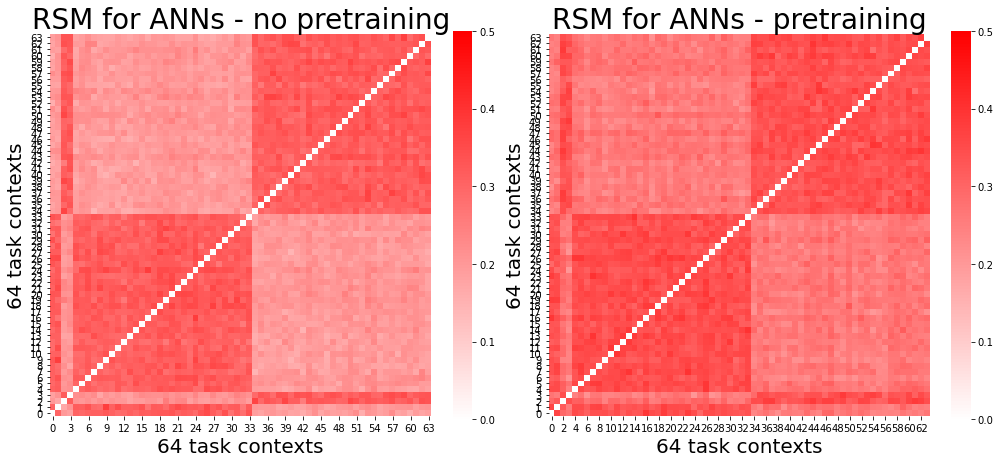

In [6]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.title('RSM for ANNs - no pretraining',fontsize=28)
rsm_avg = np.mean(np.asarray(rsm_corr_nopretraining),axis=0)
np.fill_diagonal(rsm_avg,0)
ax = sns.heatmap(rsm_avg,square=True,center=0,vmin=0,vmax=0.5,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

plt.subplot(122)
plt.title('RSM for ANNs - pretraining',fontsize=28)
rsm_avg = np.mean(np.asarray(rsm_corr_pretraining),axis=0)
np.fill_diagonal(rsm_avg,0)
ax = sns.heatmap(rsm_avg,square=True,center=0,vmin=0,vmax=0.5,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

# Visualize covariance based RSMs

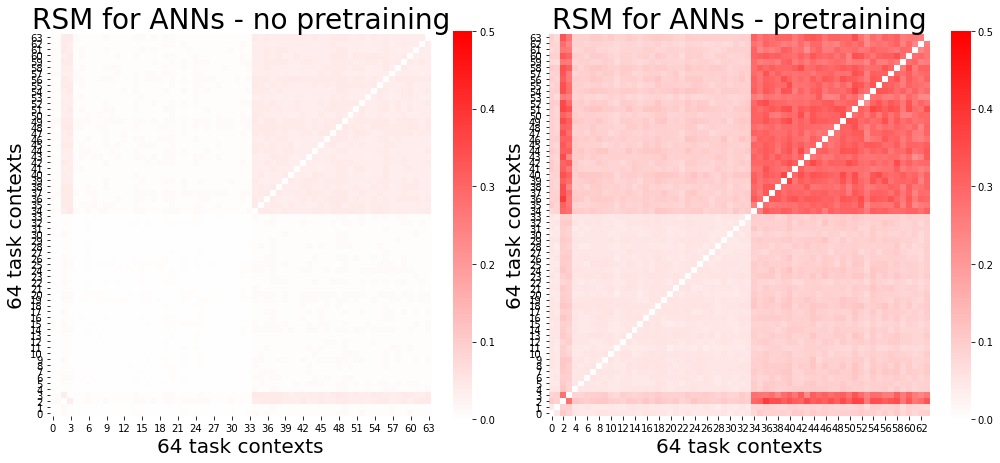

In [7]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.title('RSM for ANNs - no pretraining',fontsize=28)
rsm_avg = np.mean(np.asarray(rsm_cov_nopretraining),axis=0)
np.fill_diagonal(rsm_avg,0)
ax = sns.heatmap(rsm_avg,square=True,center=0,vmin=0,vmax=0.5,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

plt.subplot(122)
plt.title('RSM for ANNs - pretraining',fontsize=28)
rsm_avg = np.mean(np.asarray(rsm_cov_pretraining),axis=0)
np.fill_diagonal(rsm_avg,0)
ax = sns.heatmap(rsm_avg,square=True,center=0,vmin=0,vmax=0.5,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

# Compute dimensionality of sequential versus interleaved training RDMs using participation ratio (eigendecomposition of RDM)
Participation ratio, as computed by Abbott et al. 2011

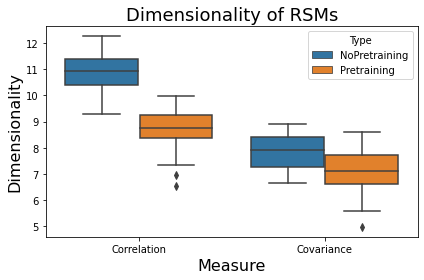

In [8]:
dim_df = {}
dim_df['Type'] = []
dim_df['Dimensionality'] = []
dim_df['Measure'] = []
for i in range(nsimulations):
    
    dim_df['Type'].append('NoPretraining')
    dim_df['Dimensionality'].append(dim_corr_nopretraining[i])
    dim_df['Measure'].append('Correlation')
    #
    dim_df['Type'].append('Pretraining')
    dim_df['Dimensionality'].append(dim_corr_pretraining[i])
    dim_df['Measure'].append('Correlation')
    #
    #
    dim_df['Type'].append('NoPretraining')
    dim_df['Dimensionality'].append(dim_cov_nopretraining[i])
    dim_df['Measure'].append('Covariance')
    #
    dim_df['Type'].append('Pretraining')
    dim_df['Dimensionality'].append(dim_cov_pretraining[i])
    dim_df['Measure'].append('Covariance')


dim_df = pd.DataFrame(dim_df)
sns.boxplot(x="Measure", y="Dimensionality", hue='Type', data=dim_df)
plt.title("Dimensionality of RSMs",fontsize=18)
plt.xlabel('Measure',fontsize=16)
plt.ylabel('Dimensionality',fontsize=16)
plt.tight_layout()


# Load networks and calculate RSMs/dimensionality of motor response representational space

In [41]:
analysis = reload(analysis)
modeldir = '../../data/results/model/'
batchfilename=modeldir+'simple'
experiment = task.Experiment(filename=batchfilename)
input_matrix, output_matrix = task.create_all_trials(experiment.taskRuleSet)
experiment.input_matrix, experiment.output_matrix = input_matrix, output_matrix
nsimulations = 20
dim_corr_pretraining = []
dim_corr_nopretraining = []
dim_cov_pretraining = []
dim_cov_nopretraining = []
rsm_corr_pretraining = []
rsm_corr_nopretraining = []
rsm_cov_pretraining = []
rsm_cov_nopretraining = []
#### Load ANNs without pretraining and compute dimensionality or RSMs
for i in range(nsimulations):
    network = torch.load(modeldir + 'simple_80acc_practice' + str(i) + '.pt',map_location=torch.device('cpu'))
    hidden, rsm_corr = analysis.rsa_behavior(network,experiment,measure='corr')
    hidden, rsm_cov = analysis.rsa_behavior(network,experiment,measure='cov')
    
    dim_corr_nopretraining.append(tools.dimensionality(rsm_corr))
    dim_cov_nopretraining.append(tools.dimensionality(rsm_cov))
    rsm_corr_nopretraining.append(rsm_corr)
    rsm_cov_nopretraining.append(rsm_cov)
    
#### Load ANNs without pretraining and compute dimensionality or RSMs
for i in range(nsimulations):
    network = torch.load(modeldir + 'simple_80acc_pretraining_practice' + str(i) + '.pt',map_location=torch.device('cpu'))
    hidden, rsm_corr = analysis.rsa_behavior(network,experiment,measure='corr')
    hidden, rsm_cov = analysis.rsa_behavior(network,experiment,measure='cov')
    
    dim_corr_pretraining.append(tools.dimensionality(rsm_corr))
    dim_cov_pretraining.append(tools.dimensionality(rsm_cov))
    rsm_corr_pretraining.append(rsm_corr)
    rsm_cov_pretraining.append(rsm_cov)

Loading previously constructed practiced and novel rule sets...


# Compute dimensionality of sequential versus interleaved training RDMs using participation ratio (eigendecomposition of RDM)
Participation ratio, as computed by Abbott et al. 2011

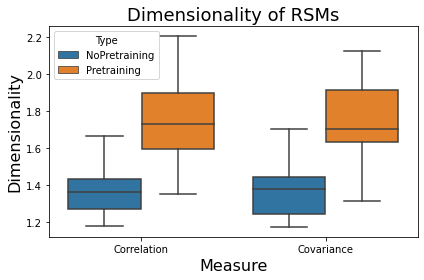

In [44]:
dim_df = {}
dim_df['Type'] = []
dim_df['Dimensionality'] = []
dim_df['Measure'] = []
for i in range(nsimulations):
    
    dim_df['Type'].append('NoPretraining')
    dim_df['Dimensionality'].append(dim_corr_nopretraining[i])
    dim_df['Measure'].append('Correlation')
    #
    dim_df['Type'].append('Pretraining')
    dim_df['Dimensionality'].append(dim_corr_pretraining[i])
    dim_df['Measure'].append('Correlation')
    #
    #
    dim_df['Type'].append('NoPretraining')
    dim_df['Dimensionality'].append(dim_cov_nopretraining[i])
    dim_df['Measure'].append('Covariance')
    #
    dim_df['Type'].append('Pretraining')
    dim_df['Dimensionality'].append(dim_cov_pretraining[i])
    dim_df['Measure'].append('Covariance')


dim_df = pd.DataFrame(dim_df)
sns.boxplot(x="Measure", y="Dimensionality", hue='Type', data=dim_df)
plt.title("Dimensionality of RSMs",fontsize=18)
plt.xlabel('Measure',fontsize=16)
plt.ylabel('Dimensionality',fontsize=16)
plt.tight_layout()
